In [1]:
!pip -q install git+git://github.com/alok-ai-lab/DeepInsight.git#egg=DeepInsight

In [2]:
#import thu vien
from pyDeepInsight import ImageTransformer, LogScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.combine import *
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Doc du lieu

data = pd.read_csv('drive/My Drive/PCKTS/Final_Project/kddcup_data_min.csv', index_col=False)
data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal
5,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal
6,0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal
7,0,tcp,http,SF,159,4087,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal
8,0,tcp,http,SF,210,151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal
9,0,tcp,http,SF,212,786,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal


In [5]:
#Xem xet du lieu ban dau voi info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

ở đây ta nhận thấy có 4 thuộc tính có kiểu dữ liệu object trong đó bao gồm nhãn (label), ta sẽ tiến hành chuyển đổi các thuộc tính này sang kiểu dữ liệu int để dễ dàng xử lí


In [6]:
#Thong ke cac chi so cua cac thuoc tinh dinh luong
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.0,494020.0,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685308e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,0.000111,0.000036,0.011352,0.001083,0.000109,0.001008,0.0,0.0,0.001387,332.286361,292.907131,0.176687,0.176609,0.057434,0.057719,0.791547,0.020982,0.028996,232.471248,188.666052,0.753781,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,0.010551,0.007793,2.012720,0.096416,0.011020,0.036482,0.0,0.0,0.037211,213.147107,246.322736,0.380717,0.381017,0.231624,0.232147,0.388190,0.082206,0.142397,64.744601,106.040205,0.410780,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,117.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,1.000000,2.000000,993.000000,28.000000,2.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Kiem tra co thuoc tinh nao co gia tri rong khong
total=data.isnull().sum().sort_values(ascending=False)
percent_1=data.isnull().sum()/data.isnull().count()*100
percent_2=(round(percent_1,1)).sort_values(ascending=False)
missing_data=pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head()

,Total,%
label,0,0.0
num_failed_logins,0,0.0
lnum_access_files,0,0.0
lnum_shells,0,0.0
lnum_file_creations,0,0.0


Như vậy bộ dữ liệu đã được xử lí các điểm dữ liệu lỗi


In [ ]:
# Thong tin tong quan ve bo data
print("So diem du lieu: " + str(data.shape[0]))
print("So thuoc tinh: " + str(data.shape[1]))
print("So nhan: " + str(len(np.unique(data['label']))))
print("Danh sach nhan: " + str(np.unique(data['label'])))

So diem du lieu: 494020
So thuoc tinh: 42
So nhan: 23
Danh sach nhan: ['back' 'buffer_overflow' 'ftp_write' 'guess_passwd' 'imap' 'ipsweep'
 'land' 'loadmodule' 'multihop' 'neptune' 'nmap' 'normal' 'perl' 'phf'
 'pod' 'portsweep' 'rootkit' 'satan' 'smurf' 'spy' 'teardrop'
 'warezclient' 'warezmaster']


,Số lượng,Tỉ lệ
smurf,280790,56.8%
neptune,107201,21.7%
normal,97277,19.7%
back,2203,0.4%
satan,1589,0.3%
ipsweep,1247,0.3%
portsweep,1040,0.2%
warezclient,1020,0.2%
teardrop,979,0.2%
pod,264,0.1%


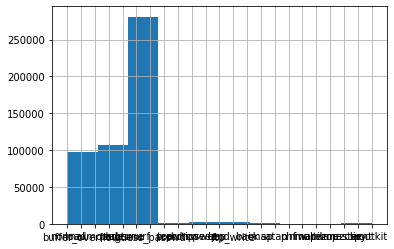

In [ ]:
# Vẽ histogram cho nhãn label
data['label'].hist()

# Tính số lượng và phần trăm số mẫu tương ứng với mỗi nhãn
counts = data['label'].value_counts()
percent100 = data['label'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
pd.concat([counts,percent100], axis=1, keys=['Số lượng', 'Tỉ lệ'])

In [ ]:
drop_list = ['guess_passwd','buffer_overflow','land','warezmaster','imap','rootkit','loadmodule','ftp_write','multihop','phf','perl','spy']
for i in drop_list:
  Index = data[data['label']== i].index
  data.drop(Index,inplace=True)

,Số lượng,Tỉ lệ
smurf,280790,56.9%
neptune,107201,21.7%
normal,97277,19.7%
back,2203,0.4%
satan,1589,0.3%
ipsweep,1247,0.3%
portsweep,1040,0.2%
warezclient,1020,0.2%
teardrop,979,0.2%
pod,264,0.1%


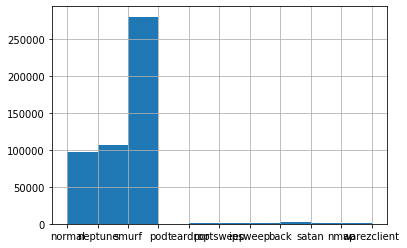

In [ ]:
# Vẽ histogram cho nhãn label
data['label'].hist()

# Tính số lượng và phần trăm số mẫu tương ứng với mỗi nhãn
counts = data['label'].value_counts()
percent100 = data['label'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
pd.concat([counts,percent100], axis=1, keys=['Số lượng', 'Tỉ lệ'])

In [ ]:
# chuan bi du lieu

x = data['protocol_type']
y = data['service']
z = data['flag']
t = data['label']
# Bien doi cac nhan onject bang label encoder thanh dang so
encoder_x = LabelEncoder()
encoder_x.fit(x)
encoder_y = LabelEncoder()
encoder_y.fit(y)
encoder_z = LabelEncoder()
encoder_z.fit(z)
encoder_t = LabelEncoder()
encoder_t.fit(t)

data['protocol_type'] = encoder_x.transform(x)
data['service'] = encoder_y.transform(y)
data['flag'] = encoder_z.transform(z)
data['label'] = encoder_t.transform(t)




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493841 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     493841 non-null  int64  
 1   protocol_type                493841 non-null  int64  
 2   service                      493841 non-null  int64  
 3   flag                         493841 non-null  int64  
 4   src_bytes                    493841 non-null  int64  
 5   dst_bytes                    493841 non-null  int64  
 6   land                         493841 non-null  int64  
 7   wrong_fragment               493841 non-null  int64  
 8   urgent                       493841 non-null  int64  
 9   hot                          493841 non-null  int64  
 10  num_failed_logins            493841 non-null  int64  
 11  logged_in                    493841 non-null  int64  
 12  lnum_compromised             493841 non-null  int64  
 13 

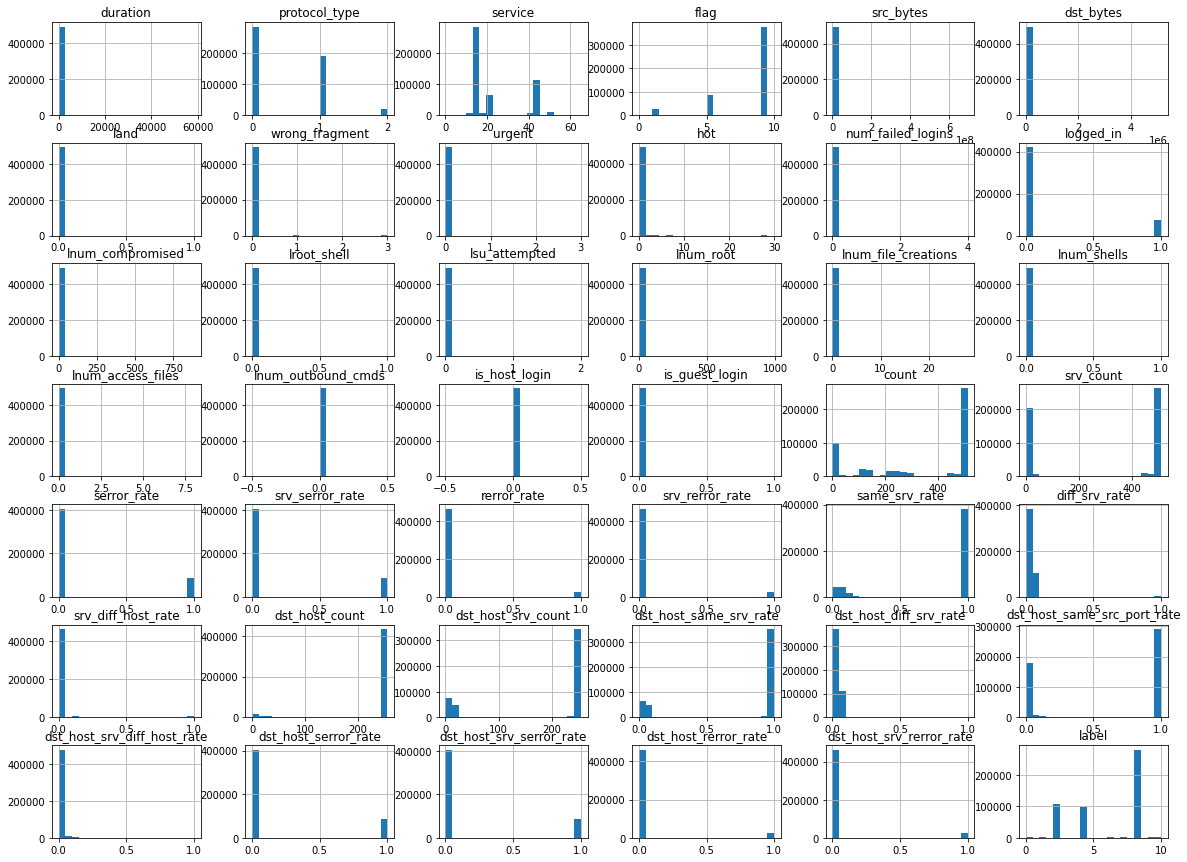

In [ ]:
# Vẽ histogram cho mỗi thuộc tính
data.hist(bins=20, figsize=(20, 15))
plt.show()

Dựa vào bảng ta nhận thấy có một số thuộc tính có số lượng một nhãn chiếm gần (>99.9%) hoặc toàn bộ điểm dữ liệu (100%), vì vậy ta sẽ tiến hành chọn 1 số thuộc tính phù hợp để lập module

In [ ]:
X = data.drop(['label'], axis=1)
Y = data['label']


In [ ]:
#chon 32 thuoc tinh tot nhat
best_32_features = SelectKBest(score_func=f_classif, k=32)
fit = best_32_features.fit(X, Y)

scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)

featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Features','Score']
print(featureScores.nlargest(32, 'Score'))

                       Features         Score
7                wrong_fragment  1.087718e+07
23                    srv_count  1.015659e+07
28                same_srv_rate  2.370347e+06
22                        count  1.566150e+06
35  dst_host_same_src_port_rate  6.350721e+05
1                 protocol_type  4.118057e+05
33       dst_host_same_srv_rate  3.815262e+05
32           dst_host_srv_count  3.030571e+05
2                       service  2.278505e+05
37         dst_host_serror_rate  1.618726e+05
24                  serror_rate  1.615388e+05
38     dst_host_srv_serror_rate  1.611177e+05
25              srv_serror_rate  1.606203e+05
3                          flag  1.527845e+05
11                    logged_in  1.071353e+05
36  dst_host_srv_diff_host_rate  7.206978e+04
29                diff_srv_rate  4.615945e+04
31               dst_host_count  4.481311e+04
34       dst_host_diff_srv_rate  3.176298e+04
9                           hot  1.613088e+04
30           srv_diff_host_rate  1

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [19 20] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
features = pd.DataFrame()
n = len(featureScores['Features'])

for i in featureScores.nlargest(32, 'Score')['Features']:
        features[i] = data[i]

features['label'] = data['label']

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493841 entries, 0 to 494019
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   wrong_fragment               493841 non-null  int64  
 1   srv_count                    493841 non-null  int64  
 2   same_srv_rate                493841 non-null  float64
 3   count                        493841 non-null  int64  
 4   dst_host_same_src_port_rate  493841 non-null  float64
 5   protocol_type                493841 non-null  int64  
 6   dst_host_same_srv_rate       493841 non-null  float64
 7   dst_host_srv_count           493841 non-null  int64  
 8   service                      493841 non-null  int64  
 9   dst_host_serror_rate         493841 non-null  float64
 10  serror_rate                  493841 non-null  float64
 11  dst_host_srv_serror_rate     493841 non-null  float64
 12  srv_serror_rate              493841 non-null  float64
 13 

In [ ]:
selected_X = features.drop(['label'], axis=1)
selected_Y = features['label']
# selected_X=selected_X.sample(frac=0.4)
# selected_Y=selected_Y.sample(frac=0.4)

In [ ]:
selected_Y.value_counts()

8     280790
2     107201
4      97277
0       2203
7       1589
1       1247
6       1040
10      1020
9        979
5        264
3        231
Name: label, dtype: int64

In [ ]:
# random_over_sampler = RandomOverSampler(ratio="not majority")
# selected_X, selected_Y = random_over_sampler.fit_resample(selected_X, selected_Y) 
# random_under_sampler = RandomUnderSampler(ratio="not minority")
# selected_X, selected_Y = random_under_sampler.fit_resample(selected_X, selected_Y) 
# selected_X=pd.DataFrame(selected_X)
# selected_Y=pd.DataFrame(selected_Y)
# selected_X=selected_X.sample(frac=0.2)
# selected_Y=selected_Y.sample(frac=0.2)
# selected_Y.value_counts()
# smote= SMOTETomek(sampling_strategy='not majority')
# selected_X,selected_Y=smote.fit_resample(selected_X,selected_Y)


In [ ]:
#chia tập dữ liệu thành các tập train, test theo tỉ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(selected_X, selected_Y, train_size=0.8, random_state=100)


In [ ]:

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(395072, 32)
(395072,)
(98769, 32)
(98769,)


In [ ]:
#Normalization
ln = LogScaler()
X_train = ln.fit_transform(X_train)
X_test = ln.transform(X_test)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)



# Huấn luyện mô hình và tinh chỉnh siêu tham số


 **1. Decision Tree**


In [ ]:
DT_param_grid = [
        {'criterion': ['gini', 'entropy'],
         'min_samples_split': [2, 5, 10, 15,20],
         'min_samples_leaf': [1,2, 5, 10, 15, 20],
         'max_features': [32,29,26,23,20,15]},
    ]

DT_clf = DecisionTreeClassifier()
DT_grid_search = GridSearchCV(DT_clf, DT_param_grid, cv=3, scoring='f1_macro', verbose=2)

In [ ]:
DT_grid_search.fit(X_train, y_train)
DT_grid_search.best_params_

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
[CV] criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=2, total=   1.5s
[CV] criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=2, total=   1.3s
[CV] criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=2, total=   1.3s
[CV] criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=5, total=   1.4s
[CV] criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=5, total=   1.3s
[CV] criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=5, total=   1.3s
[CV] criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=10, total=   1.4s
[CV] criterion=gini, max_features=32, m

In [ ]:
DT_model = DecisionTreeClassifier(criterion='entropy', max_features=29, min_samples_leaf=1, min_samples_split=2)
DT_model = DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)

In [ ]:
DT_precision_macro_test = metrics.precision_score(y_test, y_pred, average='macro')
DT_recall_macro_test = metrics.recall_score(y_test, y_pred, average='macro')
DT_f1_macro_test = metrics.f1_score(y_test, y_pred, average='macro')

DT_precision_weighted_test = metrics.precision_score(y_test, y_pred, average='weighted')
DT_recall_weighted_test = metrics.recall_score(y_test, y_pred, average='weighted')
DT_f1_weighted_test = metrics.f1_score(y_test, y_pred, average='weighted')

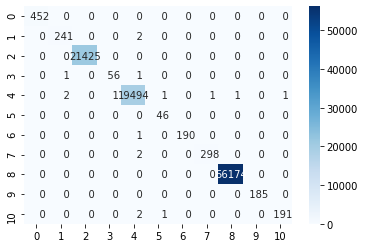

In [ ]:
DT_confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
DT_confusion_matrix_cm = pd.DataFrame(DT_confusion_matrix)
sns.heatmap(DT_confusion_matrix_cm, annot=True, annot_kws={"size": 10}, fmt='5g', cmap='Blues')

**2. Random Forests**

In [ ]:
RF_param_grid = [
        {'n_estimators': [5, 10, 20, 50],
         'criterion': ['gini', 'entropy'],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 5, 10],
         'max_features': [32, 29, 26, 22]},
    ]

RF_clf = RandomForestClassifier()
RF_grid_search = GridSearchCV(RF_clf, RF_param_grid, cv=3, scoring='f1_macro', verbose=2)

In [ ]:
RF_grid_search.fit(X_train, y_train.values.ravel())
RF_grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=2, n_estimators=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=2, n_estimators=5, total=   4.6s
[CV] criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=2, n_estimators=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV]  criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=2, n_estimators=5, total=   4.7s
[CV] criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=2, n_estimators=5 
[CV]  criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=2, n_estimators=5, total=   4.4s
[CV] criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   8.9s
[CV] criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   8.9s
[CV] criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_features=32, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   8.4s
[CV] criterion=gini, max_features=32, min_samples_leaf=1, min_sa

[Parallel(n_jobs=1)]: Done 864 out of 864 | elapsed: 175.0min finished


{'criterion': 'entropy',
 'max_features': 26,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [ ]:
RF_model = RandomForestClassifier(criterion='entropy', max_features=26, min_samples_leaf=1, min_samples_split=2, n_estimators=20)
RF_model.fit(X_train, y_train.values.ravel())
y_pred = RF_model.predict(X_test)

In [ ]:
RF_precision_macro_test = metrics.precision_score(y_test, y_pred, average='macro')
RF_recall_macro_test = metrics.recall_score(y_test, y_pred, average='macro')
RF_f1_macro_test = metrics.f1_score(y_test, y_pred, average='macro')

RF_precision_weighted_test = metrics.precision_score(y_test, y_pred, average='weighted')
RF_recall_weighted_test = metrics.recall_score(y_test, y_pred, average='weighted')
RF_f1_weighted_test = metrics.f1_score(y_test, y_pred, average='weighted')

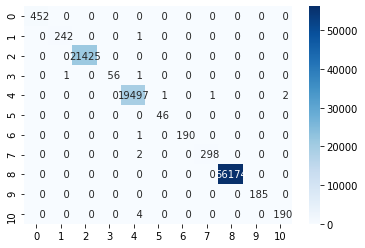

In [ ]:
RF_confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
RF_confusion_matrix_cm = pd.DataFrame(RF_confusion_matrix)
sns.heatmap(RF_confusion_matrix_cm, annot=True, annot_kws={"size": 10}, fmt='5g', cmap='Blues')

**3. Logistic Regression**

In [ ]:
LR_param_grid = [
        {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
         'C': [0.1, 1, 10, 100, 1000, 10000],
         'max_iter': [200]}
    ]

LR_clf = LogisticRegression()
LR_grid_search = GridSearchCV(LR_clf, LR_param_grid, cv=3, scoring='f1_macro', verbose=2)

In [ ]:
LR_grid_search.fit(X_train, y_train.values.ravel())
LR_grid_search.best_params_

[CV] ............ C=100, max_iter=200, solver=newton-cg, total= 2.3min
[CV] C=100, max_iter=200, solver=newton-cg ...........................
[CV] ............ C=100, max_iter=200, solver=newton-cg, total= 2.1min
[CV] C=100, max_iter=200, solver=lbfgs ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................ C=100, max_iter=200, solver=lbfgs, total= 1.1min
[CV] C=100, max_iter=200, solver=lbfgs ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................ C=100, max_iter=200, solver=lbfgs, total= 1.0min
[CV] C=100, max_iter=200, solver=lbfgs ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................ C=100, max_iter=200, solver=lbfgs, total= 1.0min
[CV] C=100, max_iter=200, solver=sag .................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=100, max_iter=200, solver=sag, total= 2.1min
[CV] C=100, max_iter=200, solver=sag .................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=100, max_iter=200, solver=sag, total= 2.1min
[CV] C=100, max_iter=200, solver=sag .................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=100, max_iter=200, solver=sag, total= 2.0min
[CV] C=100, max_iter=200, solver=saga ................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................. C=100, max_iter=200, solver=saga, total= 2.4min
[CV] C=100, max_iter=200, solver=saga ................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................. C=100, max_iter=200, solver=saga, total= 2.4min
[CV] C=100, max_iter=200, solver=saga ................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................. C=100, max_iter=200, solver=saga, total= 2.4min
[CV] C=1000, max_iter=200, solver=newton-cg ..........................
[CV] ........... C=1000, max_iter=200, solver=newton-cg, total= 4.0min
[CV] C=1000, max_iter=200, solver=newton-cg ..........................
[CV] ........... C=1000, max_iter=200, solver=newton-cg, total= 3.9min
[CV] C=1000, max_iter=200, solver=newton-cg ..........................
[CV] ........... C=1000, max_iter=200, solver=newton-cg, total= 3.6min
[CV] C=1000, max_iter=200, solver=lbfgs ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............... C=1000, max_iter=200, solver=lbfgs, total= 1.1min
[CV] C=1000, max_iter=200, solver=lbfgs ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............... C=1000, max_iter=200, solver=lbfgs, total= 1.0min
[CV] C=1000, max_iter=200, solver=lbfgs ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............... C=1000, max_iter=200, solver=lbfgs, total= 1.1min
[CV] C=1000, max_iter=200, solver=sag ................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................. C=1000, max_iter=200, solver=sag, total= 2.0min
[CV] C=1000, max_iter=200, solver=sag ................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................. C=1000, max_iter=200, solver=sag, total= 2.0min
[CV] C=1000, max_iter=200, solver=sag ................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................. C=1000, max_iter=200, solver=sag, total= 2.0min
[CV] C=1000, max_iter=200, solver=saga ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................ C=1000, max_iter=200, solver=saga, total= 2.4min
[CV] C=1000, max_iter=200, solver=saga ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................ C=1000, max_iter=200, solver=saga, total= 2.4min
[CV] C=1000, max_iter=200, solver=saga ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................ C=1000, max_iter=200, solver=saga, total= 2.4min
[CV] C=10000, max_iter=200, solver=newton-cg .........................
[CV] .......... C=10000, max_iter=200, solver=newton-cg, total= 8.8min
[CV] C=10000, max_iter=200, solver=newton-cg .........................
[CV] .......... C=10000, max_iter=200, solver=newton-cg, total= 9.1min
[CV] C=10000, max_iter=200, solver=newton-cg .........................
[CV] .......... C=10000, max_iter=200, solver=newton-cg, total= 7.5min
[CV] C=10000, max_iter=200, solver=lbfgs .............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .............. C=10000, max_iter=200, solver=lbfgs, total= 1.1min
[CV] C=10000, max_iter=200, solver=lbfgs .............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .............. C=10000, max_iter=200, solver=lbfgs, total= 1.1min
[CV] C=10000, max_iter=200, solver=lbfgs .............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .............. C=10000, max_iter=200, solver=lbfgs, total= 1.1min
[CV] C=10000, max_iter=200, solver=sag ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................ C=10000, max_iter=200, solver=sag, total= 2.1min
[CV] C=10000, max_iter=200, solver=sag ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................ C=10000, max_iter=200, solver=sag, total= 2.1min
[CV] C=10000, max_iter=200, solver=sag ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................ C=10000, max_iter=200, solver=sag, total= 2.1min
[CV] C=10000, max_iter=200, solver=saga ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............... C=10000, max_iter=200, solver=saga, total= 2.5min
[CV] C=10000, max_iter=200, solver=saga ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............... C=10000, max_iter=200, solver=saga, total= 2.5min
[CV] C=10000, max_iter=200, solver=saga ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 134.4min finished


[CV] ............... C=10000, max_iter=200, solver=saga, total= 2.5min


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'C': 1000, 'max_iter': 200, 'solver': 'lbfgs'}

In [ ]:
LR_model = LogisticRegression(C=1000, solver='lbfgs', max_iter=200)
LR_model.fit(X_train, y_train.values.ravel())
y_pred = LR_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
LR_precision_macro_test = metrics.precision_score(y_test, y_pred, average='macro')
LR_recall_macro_test = metrics.recall_score(y_test, y_pred, average='macro')
LR_f1_macro_test = metrics.f1_score(y_test, y_pred, average='macro')

LR_precision_weighted_test = metrics.precision_score(y_test, y_pred, average='weighted')
LR_recall_weighted_test = metrics.recall_score(y_test, y_pred, average='weighted')
LR_f1_weighted_test = metrics.f1_score(y_test, y_pred, average='weighted')

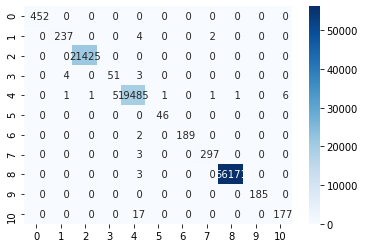

In [ ]:
LR_confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
LR_confusion_matrix_cm = pd.DataFrame(LR_confusion_matrix)
sns.heatmap(LR_confusion_matrix_cm, annot=True, annot_kws={"size": 10}, fmt='5g', cmap='Blues')

Kết quả tinh chỉnh siêu tham số cùng với số lượng thuộc tính phù hợp

In [ ]:
result = pd.DataFrame(data = {'P (macro)': [DT_precision_macro_test,RF_precision_macro_test, LR_precision_macro_test],
                              'R (macro)': [DT_recall_macro_test,RF_recall_macro_test, LR_recall_macro_test],
                              'F1 (macro)': [DT_f1_macro_test,RF_f1_macro_test, LR_f1_macro_test],
                              'P (weighted)': [DT_precision_weighted_test, RF_precision_weighted_test, LR_precision_weighted_test],
                              'R (weighted)': [DT_recall_weighted_test, RF_recall_weighted_test, LR_recall_weighted_test],
                              'F1 (weighted)': [DT_f1_weighted_test, RF_f1_weighted_test, LR_f1_weighted_test],},
                              index = ['Decision Tree', 'Random Forests', 'Logistic Regression'])

display(result.round(3))

,P (macro),R (macro),F1 (macro),P (weighted),R (weighted),F1 (weighted)
Decision Tree,0.993,0.994,0.993,1.000,1.000,1.000
Random Forests,0.996,0.994,0.995,1.000,1.000,1.000
Logistic Regression,0.984,0.977,0.980,0.999,0.999,0.999
